# Gradiente Descendente Estocástico
Este es un ejemplo del uso del __gradiente descendente estocástico__ para obtener los parámetros de un modelo supervisado por regresión lineal.

### Importación de librerías

In [1]:
import numpy as np # para vectorizar operaciones matriciales
import matplotlib.pyplot as plt # graficos
%matplotlib inline

### Datos
Generamos una muestra 

(8, 1)
(8,)


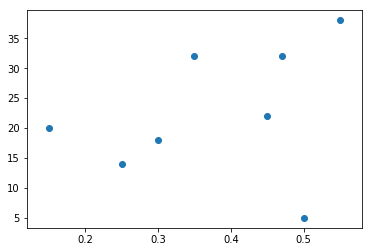

In [2]:
x = np.array([0.5, 0.15, 0.30, 0.25, 0.35, 0.45, 0.47, 0.55]).reshape((-1, 1)) # vector vertical NOTA: considerar este reshape para el proyecto final
y = np.array([5, 20, 18, 14, 32, 22, 32, 38]) # vector horizontal
print(x.shape)
print(y.shape)
plt.scatter(x,y)

### Preparación de funciones

In [3]:
def regresion_lineal(x, b):
    '''
    x (matrix): Matriz con los datos 
    b (array): Vector con los pesos a estimar 
    '''
    return np.array(b[0] + b[1]*x).reshape(1,-1)

# Definir la función de error cuadrático medio
def error_cuadratico(y, y_pred):
    '''
    y (array): Vector con los valores reales 
    y_pred (array): Vector con los valores estimados 
    '''
    return np.mean( (y - y_pred)**2 ) 
    
# Definir la función de gradiente del error
def grad_error(y, y_pred, x):
    '''
    y (array): Vector con los valores reales 
    y_pred (array): Vector con los valores estimados 
    x (matrix): Matriz con los datos 
    '''
    return np.array ( [ -2 * np.mean(y - y_pred), - 2 * np.mean(( y - y_pred) * x)]) # estas derivadas se calculan analiticamente a partir de la funcion de error

### Definición de híper-parámetros

In [4]:
eta      = 0.01 # valor sugerido en Computer Age Statistical Inference, de Bradley Efron Trevor Hastie
max_iter = 100 # un limite prudente para una aproximar una funcion lineal

### (1) Inicializar parámetros del modelo

In [5]:
# Inicializar parámetros de la regresión lineal y = w[0] + w[1]*x
# fijamos la semilla por reproducibilidad
np.random.seed(0)
w = np.random.normal(loc = 0, scale = 1, size = 2  ) # igual valores sugeridos en Computer Age Statistical Inference, que ademas mejoran la precision numerica , 
print (w)

[1.76405235 0.40015721]


### (2) Evaluar el modelo en la función de error

In [6]:
# Obtener predicción del modelo
# Evaluar en la función de error
y_pred= regresion_lineal (x,w)
error = error_cuadratico (y,y_pred)
print(error)

531.825145493629


### Iteraciones del método

[19.89076992  7.24299309]


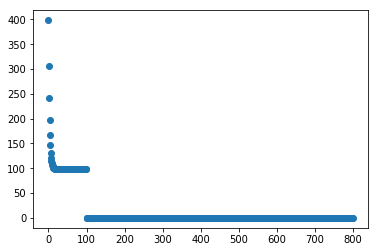

In [7]:
n = len(y)
cost_history = np.zeros(max_iter * n ) # guardemos el historial del error
for i in range(max_iter):
    for muestra in range(n):
        rand_int = np.random.randint(0, n ) # una sola observacion aleatoria
        x_i = x[rand_int, :] # slicing los datos
        y_i = y[rand_int]
        g = grad_error (y, y_pred, x) # Calcular gradiente
        # Actualizar parámetros
        w = w - eta * g
        # Evaluar el modelo en la función del error
        y_pred = regresion_lineal(x,w)
        cost_history[i] = error_cuadratico(y, y_pred)
print(w)
plt.scatter( [ i for i in range(len(cost_history)) ], cost_history )

### Evaluación del método

13.813835770528684
23.340832395950503


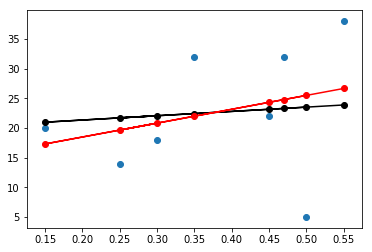

In [8]:
# Usando el modelo programado
y_pred = regresion_lineal(x, w)

# Usando el modelo de sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
y_pred_sk = model.predict(x)
plt.plot(x, y_pred[0,], marker='o', color='black')
plt.plot(x, y_pred_sk, marker='o', color='red')
plt.scatter(x,y)

print(model.intercept_)
print(model.coef_[0])

### En forma de función

In [9]:
def sgd(x, y, eta = 0.01, max_iter = 1000, semilla = 0):
    
    ''' 
    x (matrix): Matriz con los datos
    y (array): Vector con los valores a estimar
    eta (float): Leraning rate
    max_iter (int): Numero maximo de iteraciones
    semilla (int): Semilla a fijar por reproducibilidad
    '''

    # Inicializar parámetros
    np.random.seed(semilla)
    n = len(y) # tamanio de la muestra 
    cost_history = np.zeros(max_iter * n ) # guardemos el historial del error
    w = np.random.normal(loc = 0, scale = 1, size = 2  ) # igual valores sugeridos en Computer Age Statistical Inference, que ademas mejoran la precision numerica 
    
    # Evaluar modelo en función de error
    y_pred = regresion_lineal(x,w)
    error  = error_cuadratico(y,y_pred)
    
    for i in range(max_iter):
        for muestra in range(n):
            rand_int = np.random.randint(0, n ) # una sola observacion aleatoria
            x_i = x[rand_int, :] # slicing los datos
            y_i = y[rand_int]
            g = grad_error (y, y_pred, x) # Calcular gradiente
            # Actualizar parámetros
            w = w - eta * g
            # Evaluar el modelo en la función del error
            y_pred = regresion_lineal(x,w)
            cost_history[i] = error_cuadratico(y, y_pred)
            
    return [w, cost_history]

In [10]:
w_final = sgd(x, y)

In [11]:
print('Intercepto')
print(w_final[0][0])
print('Pendiente')
print(w_final[0][1])

Intercepto
19.89077008416263
Pendiente
7.242993154535927


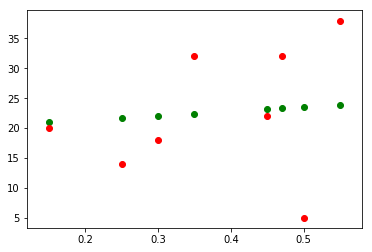

In [12]:
y_hat_gd = w_final[0][0] + w_final[0][1] * x # nuestra estimacion
plt.scatter( x, y_hat_gd, color = 'green')
plt.scatter(x, y, color = 'red', marker='o')